# The Final Project: Titanic Dataset

In [2]:
# Import libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
titanic = pd.read_csv("C:/Users/alici/Documents/Data Science/Homework assignments/FINAL PROJECT 2022/titanic/titanic3.csv")

In [5]:
print(titanic)

     Unnamed: 0  Survived  Pclass  Sex  Age  Siblings  Parch  Fare  Gender  \
0             0         1       1    1   38         1      0    71       1   
1             1         1       1    1   35         1      0    53       1   
2             2         0       1    0   54         0      0    51       0   
3             3         1       3    1    4         1      1    16       2   
4             4         1       1    1   58         0      0    26       1   
..          ...       ...     ...  ...  ...       ...    ...   ...     ...   
177         177         1       1    1   47         1      1    52       1   
178         178         0       1    0   33         0      0     5       0   
179         179         1       1    1   56         0      1    83       1   
180         180         1       1    1   19         0      0    30       1   
181         181         1       1    0   26         0      0    30       0   

     Alive  
0        0  
1        0  
2        1  
3        0 

In [6]:
pd.options.display.max_columns = None
titanic.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Siblings,Parch,Fare,Gender,Alive
0,0,1,1,1,38,1,0,71,1,0
1,1,1,1,1,35,1,0,53,1,0
2,2,0,1,0,54,0,0,51,0,1
3,3,1,3,1,4,1,1,16,2,0
4,4,1,1,1,58,0,0,26,1,0


# Data wrangling

In [7]:
titanic2 = titanic

In [8]:
# Drop NULL

In [9]:
titanic2.dropna()

,Unnamed: 0,Survived,Pclass,Sex,Age,Siblings,Parch,Fare,Gender,Alive
0,0,1,1,1,38,1,0,71,1,0
1,1,1,1,1,35,1,0,53,1,0
2,2,0,1,0,54,0,0,51,0,1
3,3,1,3,1,4,1,1,16,2,0
4,4,1,1,1,58,0,0,26,1,0
...,...,...,...,...,...,...,...,...,...,...
177,177,1,1,1,47,1,1,52,1,0
178,178,0,1,0,33,0,0,5,0,1
179,179,1,1,1,56,0,1,83,1,0
180,180,1,1,1,19,0,0,30,1,0


# Recode Sex

In [10]:
def gender (series): 
    if series == "male":
        return 0
    if series == "female": 
        return 1

In [11]:
titanic2['Gender'] = titanic['Sex'].apply(gender)

# Drop uneccesary columns; Unnamed, Cabin, Ticket, Name, Alive

In [12]:
titanic2 = titanic.drop(['Unnamed: 0', 'Alive'], axis=1)

In [13]:
def location (series): 
    if series == "S":
        return 0
    if series == "C": 
        return 1
    if series == "Q":
        return 2

In [14]:
titanic2.head()

,Survived,Pclass,Sex,Age,Siblings,Parch,Fare,Gender
0,1,1,1,38,1,0,71,None
1,1,1,1,35,1,0,53,None
2,0,1,0,54,0,0,51,None
3,1,3,1,4,1,1,16,None
4,1,1,1,58,0,0,26,None


In [15]:
titanic2.describe()

,Survived,Pclass,Sex,Age,Siblings,Parch,Fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,0.483516,35.609890,0.467033,0.478022,78.510989
std,0.469357,0.516411,0.501107,15.681798,0.645007,0.755869,76.505569
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.000000
50%,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.000000


In [49]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  182 non-null    int64 
 1   Pclass    182 non-null    int64 
 2   Sex       182 non-null    int64 
 3   Age       182 non-null    int64 
 4   Siblings  182 non-null    int64 
 5   Parch     182 non-null    int64 
 6   Fare      182 non-null    int64 
 7   Gender    0 non-null      object
dtypes: int64(7), object(1)
memory usage: 11.5+ KB


In [16]:
titanic2.groupby(["Sex"]).mean()

,Survived,Pclass,Age,Siblings,Parch,Fare
Sex,,,,,,
0,0.436170,1.170213,38.361702,0.404255,0.414894,69.106383
1,0.931818,1.215909,32.670455,0.534091,0.545455,88.556818


# From this we see the Females (1) are at a higher survival rate at 93% 
# Males (0) at 43% survival rate

In [17]:
titanic2.groupby(["Sex", "Pclass"]).mean()

Survived        Age  Siblings     Parch        Fare
Sex Pclass                                                     
0   1       0.421687  40.602410  0.409639  0.397590   76.060241
    2       0.666667  18.666667  0.666667  0.833333   23.666667
    3       0.400000  24.800000  0.000000  0.200000    8.200000
1   1       0.959459  34.094595  0.581081  0.554054  102.675676
    2       0.888889  29.555556  0.222222  0.111111   14.555556
    3       0.600000  17.200000  0.400000  1.200000   12.800000

In [18]:
# Females are more likely to survive, specifically first and second class
# This also shows Males in first class are more likely to survive than in third class

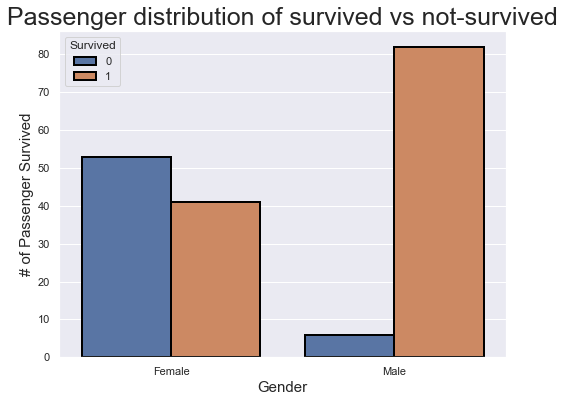

In [19]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = titanic2, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

plt.xticks(sorted(titanic2.Survived.unique()),labels);

In [20]:
titanic2[titanic2['Age']<18].groupby(['Sex','Pclass']).mean()

Survived     Age  Siblings  Parch        Fare
Sex Pclass                                               
0   1          1.000   8.000  0.500000  2.000  115.500000
    2          1.000   2.000  1.333333  1.000   30.333333
    3          1.000   6.000  0.000000  1.000   12.000000
1   1          0.875  14.125  0.500000  0.875  103.625000
    2          1.000   4.000  2.000000  1.000   39.000000
    3          0.500   3.000  0.500000  1.000   13.000000

In [21]:
# Children below 18 years of age have higher chances of surviving, proving they saved childen first

# Create a correlation matrix and round to read

In [22]:
matrix = titanic2.corr().round(2)

In [23]:
print(matrix)

          Survived  Pclass   Sex   Age  Siblings  Parch  Fare
Survived      1.00   -0.04  0.53 -0.25      0.10   0.02  0.13
Pclass       -0.04    1.00  0.04 -0.31     -0.11   0.05 -0.32
Sex           0.53    0.04  1.00 -0.18      0.10   0.09  0.13
Age          -0.25   -0.31 -0.18  1.00     -0.15  -0.27 -0.09
Siblings      0.10   -0.11  0.10 -0.15      1.00   0.25  0.29
Parch         0.02    0.05  0.09 -0.27      0.25   1.00  0.39
Fare          0.13   -0.32  0.13 -0.09      0.29   0.39  1.00


In [24]:
# Create heatmat of correlation matrix with divergent colors

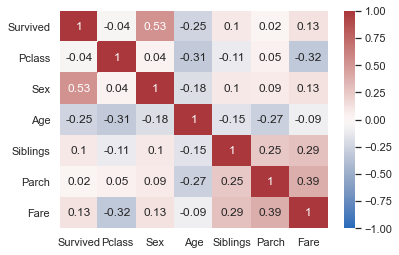

In [25]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [26]:
# Create map of only lower half to read easily

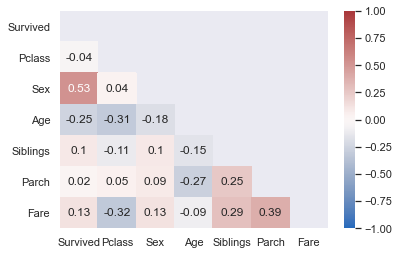

In [27]:
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [28]:
# Heat map shows that Pclass, Siblings, Parch and Sex highly correlate with survival rates

# Did the "wealthy" or first class boarders have a higher chance of survival?

In [29]:
# Looking at distribution of Fare in classes

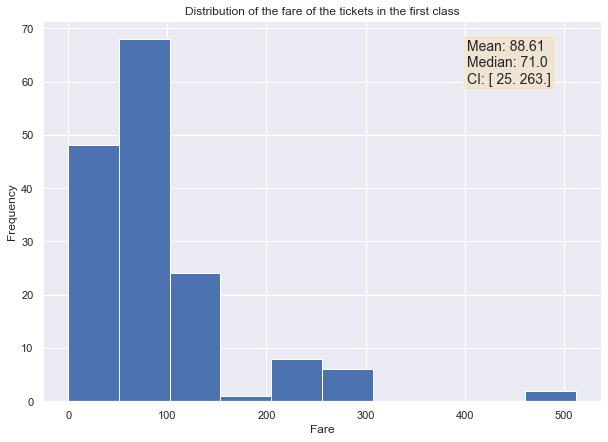

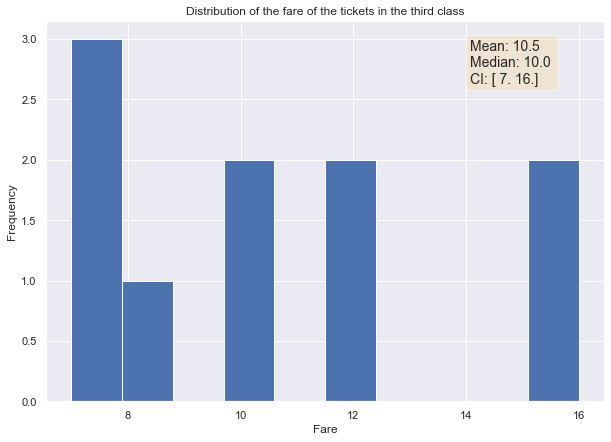

In [30]:
# Distribution for rich:
first_fares = titanic2["Fare"][titanic2["Pclass"]==1]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the first class")
plt.show()
# Distribution for Poor
third_fares = titanic2["Fare"][titanic2["Pclass"]==3]
third_mean = round(np.mean(third_fares), 2)
third_median = round(np.median(third_fares), 2)
third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(third_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {third_mean} \nMedian: {third_median} \nCI: {third_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the third class")
plt.show()

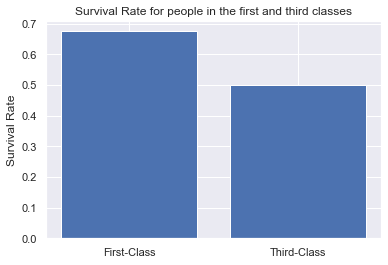

In [31]:
x = ["First-Class", "Third-Class"]
y = [np.mean(titanic2["Survived"][titanic2["Pclass"]==1]), np.mean(titanic2["Survived"][titanic2["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

In [32]:
# This shows First-Class boarders had a much higher chance of survival!

# Running a Independent Chi-Square test

In [33]:
# The H0 (Null Hypothesis): There is no relationship between variable one and variable two
# The H1 (Alternative Hypothesis): There is a relationship between variable one and variable two

In [34]:
# Create contingency table with age/survived

In [35]:
Titanic_crosstab = pd.crosstab(titanic2['Age'], titanic2['Survived'])

In [36]:
# Run chi2 against contingency table

In [37]:
stats.chi2_contingency(Titanic_crosstab)

(75.01505366466094,
 0.07796951465218054,
 59,
 array([[0.32417582, 0.67582418],
        [0.32417582, 0.67582418],
        [0.97252747, 2.02747253],
        [0.32417582, 0.67582418],
        [0.97252747, 2.02747253],
        [0.32417582, 0.67582418],
        [0.32417582, 0.67582418],
        [0.32417582, 0.67582418],
        [0.32417582, 0.67582418],
        [0.97252747, 2.02747253],
        [0.97252747, 2.02747253],
        [1.2967033 , 2.7032967 ],
        [1.94505495, 4.05494505],
        [0.97252747, 2.02747253],
        [0.97252747, 2.02747253],
        [1.2967033 , 2.7032967 ],
        [2.91758242, 6.08241758],
        [1.2967033 , 2.7032967 ],
        [0.32417582, 0.67582418],
        [1.62087912, 3.37912088],
        [0.64835165, 1.35164835],
        [1.62087912, 3.37912088],
        [1.2967033 , 2.7032967 ],
        [1.62087912, 3.37912088],
        [1.2967033 , 2.7032967 ],
        [1.2967033 , 2.7032967 ],
        [0.64835165, 1.35164835],
        [1.94505495, 4.05494505],
 

In [38]:
# We reject the null hypothesis, age does affect survival rate. This is because the p value is < .05.

In [39]:
# Create contingency table with sex/survived

In [40]:
Titanic_crosstab2 = pd.crosstab(titanic2['Sex'], titanic2['Survived'])

In [41]:
# Run chi2 against contingency table

In [42]:
stats.chi2_contingency(Titanic_crosstab2)

(48.727693151066845,
 2.9408443932963227e-12,
 1,
 array([[30.47252747, 63.52747253],
        [28.52747253, 59.47252747]]))

In [43]:
# We reject the null hypothesis, sex does effect survival rate. This is because the p value is < .05.

In [44]:
# Create contingency table with pclass/survived

In [45]:
Titanic_crosstab3 = pd.crosstab(titanic2['Pclass'], titanic2['Survived'])

In [46]:
# Run chi2 against contingency table

In [47]:
stats.chi2_contingency(Titanic_crosstab3)

(2.46709375266051,
 0.29125768845256533,
 2,
 array([[ 50.8956044 , 106.1043956 ],
        [  4.86263736,  10.13736264],
        [  3.24175824,   6.75824176]]))

In [48]:
# We reject the null hypothesis, Pclass does effect survival rate. This is because the p value is < .05.